In [1]:
import os
from pathlib import Path

local_root_directory = '/Users/stefanduprey/Documents/My_Data/My_TitanicData/'
path = Path(local_root_directory)

if path.exists():
    raise Exception('already downloaded')
    
import zipfile,kaggle
kaggle.api.competition_download_cli(str(path))
zipfile.ZipFile(f'{path}.zip').extractall(path)
    

Exception: already downloaded

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [3]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [6]:
df.fillna(modes, inplace=True)

In [7]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
import numpy as np

df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


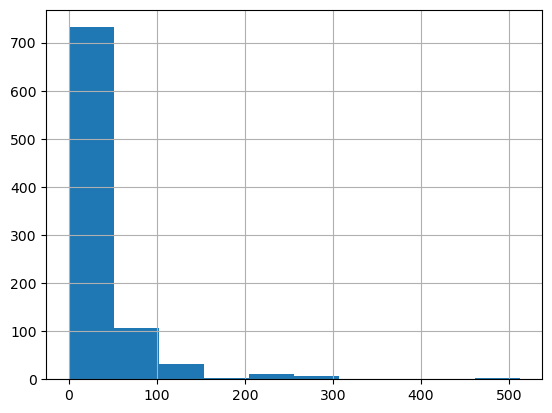

In [9]:
df['Fare'].hist();

In [10]:
df['LogFare'] = np.log(df['Fare']+1)

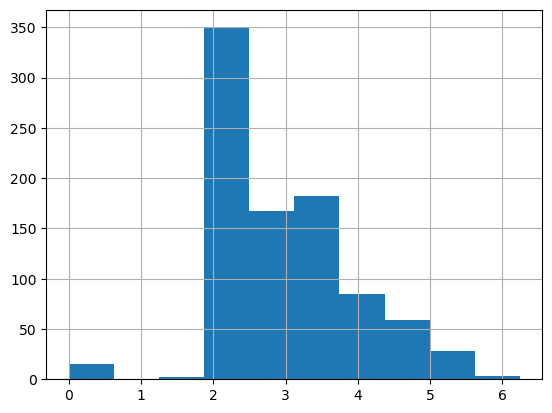

In [11]:
df['LogFare'].hist();

In [12]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [13]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [14]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [15]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,True,False,False,False,True,False,False,True
1,False,True,True,False,False,True,False,False
2,False,True,False,False,True,False,False,True
3,False,True,True,False,False,False,False,True
4,True,False,False,False,True,False,False,True


In [16]:
from torch import tensor
t_dep = tensor(df.Survived)

In [17]:
t_dep.shape

torch.Size([891])

In [18]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols
temp_nd_array = df[indep_cols].values
temp_nd_array=temp_nd_array.astype(float)

In [19]:
t_indep = tensor(temp_nd_array, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [20]:
t_indep.shape

torch.Size([891, 12])

In [21]:
torch.manual_seed(452)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff,dtype=torch.float)-0.5
coeffs

tensor([ 0.4257, -0.4608, -0.2451,  0.1313, -0.1797, -0.4754, -0.2806, -0.4989,  0.3610,  0.1406,  0.1596,  0.2663])

In [22]:
coeffs.shape

torch.Size([12])

In [23]:
t_indep*coeffs

tensor([[ 9.3664, -0.4608, -0.0000,  0.2771, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [16.1783, -0.4608, -0.0000,  0.5621, -0.0000, -0.4754, -0.2806, -0.0000,  0.0000,  0.1406,  0.0000,  0.0000],
        [11.0693, -0.0000, -0.0000,  0.2874, -0.0000, -0.4754, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [14.9010, -0.4608, -0.0000,  0.5241, -0.0000, -0.4754, -0.2806, -0.0000,  0.0000,  0.0000,  0.0000,  0.2663],
        [14.9010, -0.0000, -0.0000,  0.2893, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [10.2178, -0.0000, -0.0000,  0.2951, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.1596,  0.0000],
        [22.9902, -0.0000, -0.0000,  0.5210, -0.1797, -0.0000, -0.2806, -0.0000,  0.0000,  0.0000,  0.0000,  0.2663],
        ...,
        [10.6436, -0.0000, -0.0000,  0.2739, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [16.6040, -0.0000, -1.2254,  0.4472

In [24]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [25]:
t_indep*coeffs

tensor([[ 0.1171, -0.0576, -0.0000,  0.0444, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 0.2022, -0.0576, -0.0000,  0.0901, -0.0000, -0.4754, -0.2806, -0.0000,  0.0000,  0.1406,  0.0000,  0.0000],
        [ 0.1384, -0.0000, -0.0000,  0.0461, -0.0000, -0.4754, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 0.1863, -0.0576, -0.0000,  0.0840, -0.0000, -0.4754, -0.2806, -0.0000,  0.0000,  0.0000,  0.0000,  0.2663],
        [ 0.1863, -0.0000, -0.0000,  0.0464, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 0.1277, -0.0000, -0.0000,  0.0473, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.1596,  0.0000],
        [ 0.2874, -0.0000, -0.0000,  0.0835, -0.1797, -0.0000, -0.2806, -0.0000,  0.0000,  0.0000,  0.0000,  0.2663],
        ...,
        [ 0.1330, -0.0000, -0.0000,  0.0439, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 0.2076, -0.0000, -0.2042,  0.0717

In [26]:
preds = (t_indep*coeffs).sum(axis=1)

In [27]:
preds[:10]

tensor([ 0.5514, -0.3807,  0.3363, -0.2771,  0.6802,  0.5159,  0.1768,  0.3097,  0.2663, -0.7444])

In [28]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.6665)

In [29]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [30]:
coeffs.requires_grad_()

tensor([ 0.4257, -0.4608, -0.2451,  0.1313, -0.1797, -0.4754, -0.2806, -0.4989,  0.3610,  0.1406,  0.1596,  0.2663], requires_grad=True)

In [31]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.6665, grad_fn=<MeanBackward0>)

In [32]:
loss.backward()

In [33]:
coeffs.grad

tensor([-0.0230, -0.0062, -0.0127, -0.0884,  0.1425, -0.2110, -0.1279, -0.2043,  0.2637, -0.0808,  0.0146, -0.0022])

In [34]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.0460, -0.0123, -0.0254, -0.1768,  0.2851, -0.4220, -0.2559, -0.4085,  0.5275, -0.1616,  0.0292, -0.0045])

In [35]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.6044)


In [36]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [37]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [38]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")
def init_coeffs(): return (torch.rand(n_coeff, dtype=torch.float)-0.5).requires_grad_()

In [39]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [40]:
coeffs = train_model(18, lr=0.2)

0.536; 0.502; 0.477; 0.454; 0.431; 0.409; 0.388; 0.367; 0.349; 0.336; 0.330; 0.326; 0.329; 0.304; 0.314; 0.296; 0.300; 0.289; 

In [41]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'LogFare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

In [42]:
preds = calc_preds(coeffs, val_indep)

In [43]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [44]:
results.shape

torch.Size([178])

In [45]:
results.float().mean()

tensor(0.7865)

In [46]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7865)

In [47]:
preds[:28]

tensor([ 0.8160,  0.1295, -0.0148,  0.1831,  0.1520,  0.1350,  0.7279,  0.7754,  0.3222,  0.6740,  0.0753,  0.0389,  0.2216,  0.7631,
         0.0678,  0.3997,  0.3324,  0.8278,  0.1078,  0.7126,  0.1023,  0.3627,  0.9937,  0.8050,  0.1153,  0.1455,  0.8652,  0.3425])

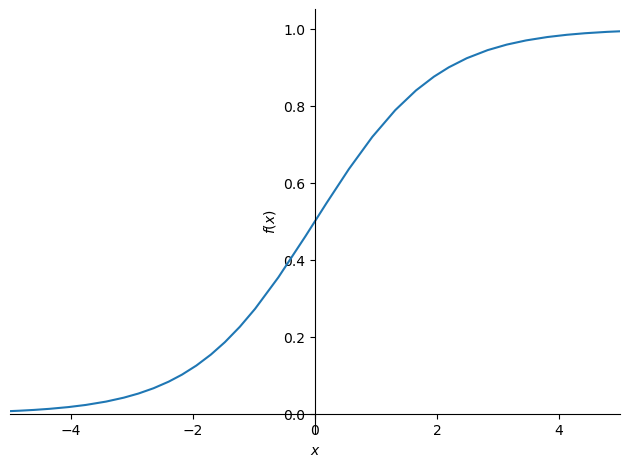

In [48]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [49]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [50]:
coeffs = train_model(lr=100)

0.510; 0.327; 0.294; 0.207; 0.201; 0.199; 0.198; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [51]:
acc(coeffs)

tensor(0.8258)

In [52]:
show_coeffs()

{'Age': tensor(-1.5061),
 'SibSp': tensor(-1.1575),
 'Parch': tensor(-0.4267),
 'LogFare': tensor(0.2543),
 'Sex_male': tensor(-10.3320),
 'Sex_female': tensor(8.4185),
 'Pclass_1': tensor(3.8389),
 'Pclass_2': tensor(2.1398),
 'Pclass_3': tensor(-6.2331),
 'Embarked_C': tensor(1.4771),
 'Embarked_Q': tensor(2.1168),
 'Embarked_S': tensor(-4.7958)}

In [53]:
tst_df = pd.read_csv(path/'train.csv')
tst_df['Fare'] = tst_df.Fare.fillna(0)
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values.astype(float), dtype=torch.float)
tst_indep = tst_indep / vals
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [54]:
!head sub.csv

PassengerId,Survived
1,0
2,1
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [55]:
(val_indep*coeffs).sum(axis=1)

tensor([ 12.3288, -14.8119, -15.4540, -13.1513, -13.3511, -13.6468,   3.6248,   5.3429, -22.0878,   3.1233, -21.8742, -15.6421, -21.5504,
          3.9393, -21.9190, -12.0010, -12.3775,   5.3550, -13.5880,  -3.1015, -21.7237, -12.2081,  12.9767,   4.7427, -21.6525, -14.9135,
         -2.7433, -12.3210, -21.5886,   3.9387,   5.3890,  -3.6196, -21.6296, -21.8454,  12.2159,  -3.2275, -12.0289,  13.4560, -21.7230,
         -3.1366, -13.2462, -21.7230, -13.6831,  13.3092, -21.6477,  -3.5868, -21.6854, -21.8316, -14.8158,  -2.9386,  -5.3103, -22.2384,
        -22.1097, -21.7466, -13.3780, -13.4909, -14.8119, -22.0690, -21.6666, -21.7818,  -5.4439, -21.7407, -12.6551, -21.6671,   4.9238,
        -11.5777, -13.3323, -21.9638, -15.3030,   5.0243, -21.7614,   3.1820, -13.4721, -21.7170, -11.6066, -21.5737, -21.7230, -11.9652,
        -13.2382, -13.7599, -13.2170,  13.1347, -21.7049, -21.7268,   4.9207,  -7.3198,  -5.3081,   7.1066,  11.4948, -13.3135, -21.8723,
        -21.7230,  13.3603, -15.56

In [56]:
val_indep

tensor([[0.3000, 0.0000, 0.0000, 0.4152, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000],
        [0.3000, 0.0000, 0.0000, 0.3473, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.3000, 0.0000, 0.0000, 0.3377, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
        [0.2250, 0.0000, 0.0000, 0.6907, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.3125, 0.0000, 0.0000, 0.4229, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.4250, 0.1250, 0.0000, 0.4953, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0500, 0.0000, 0.1667, 0.4276, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
        ...,
        [0.2375, 0.0000, 0.0000, 0.4392, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.2750, 0.1250, 0.0000, 0.6752, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.3000, 0.0000, 0.0000, 

In [57]:
coeffs

tensor([ -1.5061,  -1.1575,  -0.4267,   0.2543, -10.3320,   8.4185,   3.8389,   2.1398,  -6.2331,   1.4771,   2.1168,  -4.7958])

In [58]:
val_indep@coeffs

tensor([ 12.3288, -14.8119, -15.4540, -13.1513, -13.3511, -13.6468,   3.6248,   5.3429, -22.0878,   3.1233, -21.8742, -15.6421, -21.5504,
          3.9393, -21.9190, -12.0010, -12.3775,   5.3550, -13.5880,  -3.1015, -21.7237, -12.2081,  12.9767,   4.7427, -21.6525, -14.9135,
         -2.7433, -12.3210, -21.5886,   3.9387,   5.3890,  -3.6196, -21.6296, -21.8454,  12.2159,  -3.2275, -12.0289,  13.4560, -21.7230,
         -3.1366, -13.2462, -21.7230, -13.6831,  13.3092, -21.6477,  -3.5868, -21.6854, -21.8316, -14.8158,  -2.9386,  -5.3103, -22.2384,
        -22.1097, -21.7466, -13.3780, -13.4909, -14.8119, -22.0690, -21.6666, -21.7818,  -5.4439, -21.7407, -12.6551, -21.6671,   4.9238,
        -11.5777, -13.3323, -21.9638, -15.3030,   5.0243, -21.7614,   3.1820, -13.4721, -21.7170, -11.6066, -21.5737, -21.7230, -11.9652,
        -13.2382, -13.7599, -13.2170,  13.1347, -21.7049, -21.7268,   4.9207,  -7.3198,  -5.3081,   7.1065,  11.4948, -13.3135, -21.8723,
        -21.7230,  13.3603, -15.56

In [59]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [60]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [61]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [62]:
coeffs = train_model(lr=100)

0.512; 0.323; 0.290; 0.205; 0.200; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [63]:
acc(coeffs)

tensor(0.8258)

In [64]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [65]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [66]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [67]:
coeffs = train_model(lr=1.4)

0.543; 0.532; 0.520; 0.505; 0.487; 0.466; 0.439; 0.407; 0.373; 0.343; 0.319; 0.301; 0.286; 0.274; 0.264; 0.256; 0.250; 0.245; 0.240; 0.237; 0.234; 0.231; 0.229; 0.227; 0.226; 0.224; 0.223; 0.222; 0.221; 0.220; 

In [68]:
coeffs = train_model(lr=20)

0.543; 0.400; 0.260; 0.390; 0.221; 0.211; 0.197; 0.195; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [69]:
acc(coeffs)

tensor(0.8258)

In [70]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [71]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [72]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [73]:
coeffs = train_model(lr=4)

0.521; 0.483; 0.427; 0.379; 0.379; 0.379; 0.379; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.377; 0.376; 0.371; 0.333; 0.239; 0.224; 0.208; 0.204; 0.203; 0.203; 0.207; 0.197; 0.196; 0.195; 

In [74]:
acc(coeffs)

tensor(0.8258)